In [64]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets


### 정밀도(precision) / 재현율(recall) trade_off
- sklearn Binarizer 클래스 fit_transform()
- 임계값 (threshold) 보다 크면 1, 작으면 0 리턴


In [65]:
x = [[-1,-1,2],
    [2,0,0],
    [0, 1.1, 1.2]]

In [66]:
holder = Binarizer (threshold = 0.5)
print (holder.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [67]:
- predic_proba() : 개별 타켓(레이블)별 예측확률 값을 반환 받을 수 있다.

SyntaxError: invalid syntax (<ipython-input-67-5e5d0e95ef7b>, line 1)

In [68]:
titanic = pd.read_csv('./data/titanic_train.csv')
titanic

titanic_label = titanic['Survived']
titanic_data  = titanic.drop(['Survived'], axis =1)

In [69]:
# 레일블 인코딩 Cabin , Sex , Embarked
def drop_features(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm


def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace=True)
    frm['Cabin'].fillna('N', inplace=True)
    frm['Embarked'].fillna('N', inplace=True)
    return frm


def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(frm[feature])
        frm[feature] = encoder.transform(frm[feature])
    return  frm

def transform_features(frm):
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    return frm


In [70]:
titanic_data_feature = transform_features(titanic_data)
titanic_data_feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [71]:
def metrics_evaluation(y_test, y_pred):
    print("정확도 : {}, 정밀도 : {}, 재현율 : {}, F1 : {}"
         .format(accuracy_score(y_test, y_pred),
                 precision_score(y_test, y_pred),
                 recall_score(y_test, y_pred),
                 f1_score(y_test, y_pred)))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data_feature,
                                                   titanic_label,
                                                   test_size = .2,
                                                   random_state = 10)

In [73]:
logistic_model = LogisticRegression()

# 학습
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [74]:
# 예측
y_pred = logistic_model.predict(X_test)


# 확률예측값
y_pred_proba = logistic_model.predict_proba(X_test)

In [75]:
# y_pred_proba.shape
# y_pred_proba
# y_pred
# y_pred.shape

# 예측값과 예측확률 결과를 병합
pred_prob_result = np.concatenate( [y_pred_proba, y_pred.reshape(-1, 1)] , axis = 1 )
pred_prob_result[ : 10]

array([[0.90631212, 0.09368788, 0.        ],
       [0.85368903, 0.14631097, 0.        ],
       [0.87710799, 0.12289201, 0.        ],
       [0.07317317, 0.92682683, 1.        ],
       [0.10653787, 0.89346213, 1.        ],
       [0.84932976, 0.15067024, 0.        ],
       [0.85604693, 0.14395307, 0.        ],
       [0.85755843, 0.14244157, 0.        ],
       [0.89730404, 0.10269596, 0.        ],
       [0.86181937, 0.13818063, 0.        ]])

In [76]:
metrics_evaluation(y_test, y_pred)

정확도 : 0.8268156424581006, 정밀도 : 0.746031746031746, 재현율 : 0.7580645161290323, F1 : 0.752


In [77]:
user_th = 0.3

y_pred_proba_01 = y_pred_proba[ : 1].reshape(-1,1)
user_pred = Binarizer (threshold = user_th).fit_transform(y_pred_proba_01)
user_pred

array([[1.],
       [0.]])

In [79]:
metrics_evaluation(y_test, user_pred)

ValueError: Found input variables with inconsistent numbers of samples: [179, 2]

In [ ]:
- TPR (True Positive Rate)

    TP
--------
 TP + FN
    
- TNR (True Negative Rate)

    TN
--------
 TN + FP

In [89]:
pred_positive_label = logistic_model.predict_proba(X_test)[ : , 1]
pred_positive_label

precision, recall, threshold = precision_recall_curve(y_test, pred_positive_label)
precision, recall, threshold
precision.shape, recall.shape, threshold.shape

((163,), (163,), (162,))

- 시각화(정밀도-재현율이 임계값 변화에 따른 시각화)

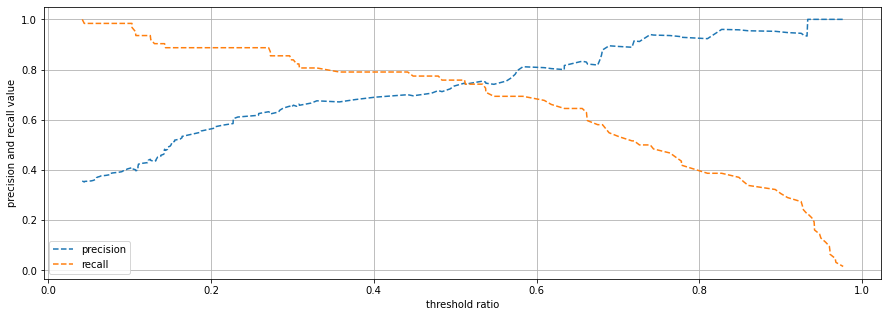

In [91]:
# 임계값이 1에 가까우면 TNR 커지고, FPR 작아진다


plt.figure(figsize =(15,5))

plt.plot(threshold, precision[ 0 : threshold.shape[0] ], linestyle ='--', label='precision')
plt.plot(threshold, recall[ 0 : threshold.shape[0] ], linestyle ='--', label='recall')


plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()

plt.show()
plt.close()

#### ROC AUC
- FPR (False Positive Rate) 변할때 TPR 이 어떻게 변하는지

- 타이타닉을 이용한 생존자 예측 FPR, TPR, 임계값
- ROC_curve (실제값, 확률값)

In [106]:
pred_positive_label = logistic_model.predict_proba(X_test)[: , 1]
pred_positive_label.shape

ftps, tprs, thresholds = roc_curve(y_test, pred_positive_label)
ftps.shape, tprs.shape, thresholds.shape

# 샘플추출
thr_idx = np.arange(1, thresholds.shape[0], 6)
thr_idx

array([ 1,  7, 13, 19, 25, 31, 37, 43, 49, 55])

In [105]:
thresholds[thr_idx]

array([0.97698577, 0.72657225, 0.65624216, 0.51156367, 0.32997703,
       0.29652968, 0.18782274, 0.12521514, 0.11005972, 0.02702714])

In [102]:
ftps[thr_idx]

array([0.        , 0.02564103, 0.06837607, 0.13675214, 0.20512821,
       0.23931624, 0.37606838, 0.62393162, 0.72649573, 1.        ])

In [103]:
tprs[thr_idx]

array([0.01612903, 0.5       , 0.64516129, 0.75806452, 0.80645161,
       0.85483871, 0.88709677, 0.93548387, 0.93548387, 1.        ])

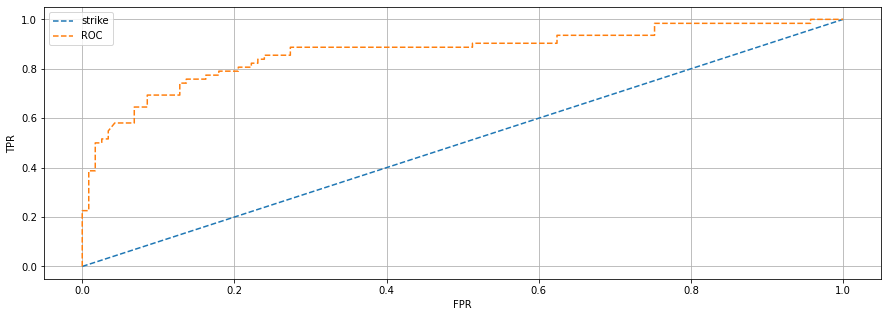

In [112]:
# 임계값이 1에 가까우면 TNR 커지고, FPR 작아진다


plt.figure(figsize =(15,5))

plt.plot([0,1],[0,1], linestyle ='--', label='strike')

plt.plot(ftps, tprs, linestyle ='--', label='ROC')


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()

plt.show()
plt.close()

In [115]:
# AUC 성능평가 확인

def metrics_evaluation(y_test, y_pred):
    print("정확도 : {}, 정밀도 : {}, 재현율 : {}, F1 : {}, AUC : {}"
         .format(accuracy_score(y_test, y_pred),
                 precision_score(y_test, y_pred),
                 recall_score(y_test, y_pred),
                 f1_score(y_test, y_pred),
                 roc_auc_score(y_test, y_pred)))

In [116]:
metrics_evaluation(y_test, y_pred)

정확도 : 0.8268156424581006, 정밀도 : 0.746031746031746, 재현율 : 0.7580645161290323, F1 : 0.752, AUC : 0.8106561896884479
